In [68]:
import chess
import chess.pgn
import chess.svg
import matplotlib.pyplot as plt
from lru import LRU
from IPython.display import SVG, display, clear_output
import numpy as np
import re

%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport nnchess
%aimport load_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
def show_svg(board, arrows = []):
    res = []
    
    for m in arrows:
        res.append((m.from_square, m.to_square))
        
    brd = chess.svg.board(board, arrows=res, size=300)
    display(SVG(brd))


In [3]:
def callback(b, moves=[], data=[]):
    clear_output()
    show_svg(b, moves)
    if len(data) > 0:
        print data
    
simulation = nnchess.Simulation(
    eval1 = None,
    eval2 = None,
    openingBookFile = "data/openings/komodo.bin", 
    endGameDir = "data/endgame/",
    bookMax1 = 5,
    maxDepth1 = 3,
    bookMax2 = 10,
    maxDepth2 = 2,
    cb = callback)

# simulation.start()

In [87]:
func_aws = load_model.get_model_from_pickle('model_aws.pickle')
func = load_model.get_model_from_pickle('model.pickle')

building expression graph
building expression graph


In [88]:
import string
import numpy

strip_whitespace = re.compile(r"\s+")
translate_pieces = string.maketrans(".pnbrqkPNBRQK", "\x00" + "\x01\x02\x03\x04\x05\x06" + "\x08\x09\x0a\x0b\x0c\x0d")

def sf2array(pos, flip):
    # Create a numpy array from a sunfish representation
    pos = strip_whitespace.sub('', str(pos)) # should be 64 characters now
    pos = pos.translate(translate_pieces)
    m = numpy.fromstring(pos, dtype=numpy.int8)
    if flip:
        m = numpy.fliplr(m.reshape(8, 8))
    return m.reshape(1,64)

nnEval = lambda pos: float(func(sf2array(pos, pos.turn)))
nnEval_aws = lambda pos: float(func_aws(sf2array(pos, pos.turn)))

In [80]:
b = chess.Board()
b.push(chess.Move.from_uci("e2e4"))
sf2array(b,b.turn)

array([[ 4,  2,  3,  5,  6,  3,  2,  4,  1,  1,  1,  1,  1,  1,  1,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  8,  8,
         8,  0,  8,  8,  8, 11,  9, 10, 12, 13, 10,  9, 11]], dtype=int8)

In [81]:
tests = [("r1kq3r/p4Q2/1ppBp1Bp/3nP3/3P2P1/8/P4P2/R4RK1 w - - 0 24", 1),
         ("r6r/p7/k2B3p/2R1P3/3P2q1/8/P2n1P2/1R2K3 b - - 3 34", 0),
         ("r6r/p4Q2/k1pB3p/1p1nP3/3P2Pq/3B4/P4P2/R1R3K1 w - - 2 28", 1)]

for t in tests:
    print nnEval(chess.Board(t[0])), t[1] # black


-2.10277152061 1
-0.227422058582 0
-2.84838628769 1


In [97]:
simulation_NNvsTrivial = nnchess.Simulation(
    eval1 = nnEval_aws,
    eval2 = nnEval,
    openingBookFile = "data/openings/komodo.bin", 
    endGameDir = "data/endgame/",
    bookMax1 = 3,
    maxDepth1 = 2,
    bookMax2 = 3,
    maxDepth2 = 2,
    cb = callback)

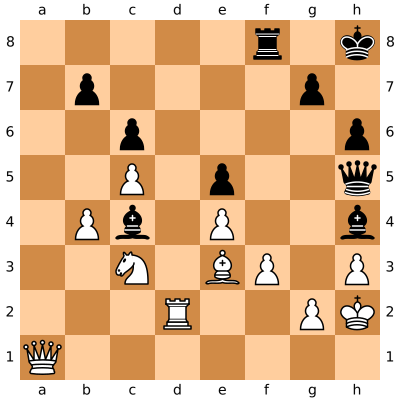

In [101]:
puzzle = chess.Board("5r1k/1p4p1/2p4p/2P1p2q/1Pb1P2b/2N1BP1P/3R2PK/Q7 b - - 20 0")
puzzle

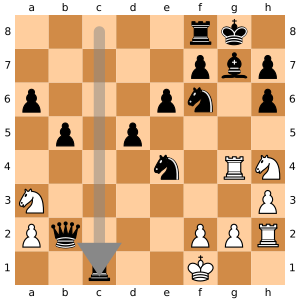

In [98]:
# simulation_NNvsTrivial.setBoard(chess.Board("rn4nr/1b1k1pp1/8/4p1p1/2p5/b6N/P2PKPPP/1q4R1 b - - 19 26"))
simulation_NNvsTrivial.start(50)


In [39]:
simulation_NNvsNN = nnchess.Simulation(
    eval1 = nnEval,
    eval2 = nnEval,
    openingBookFile = "data/openings/komodo.bin", 
    endGameDir = "data/endgame/",
    bookMax1 = 4,
    maxDepth1 = 3,
    bookMax2 = 4,
    maxDepth2 = 3,
    cb = callback)

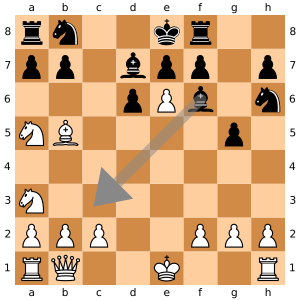

KeyboardInterrupt: 

In [41]:
simulation_NNvsNN.start(100)

In [35]:
simulation_NNvsTrivial.brd.fen()

'rn4nr/1b1k1pp1/8/4p1p1/2p5/b6N/P2PKPPP/1q4R1 b - - 19 26'

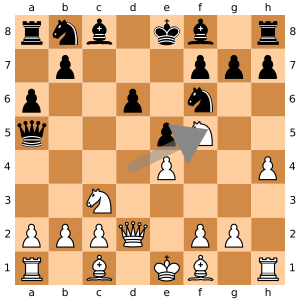

{'moveNumber': 2, 'uniq_nodes_calculated': 1471193, 'bookmoves': 0, 'time_spent': 596.3855521678925, 'cache_hits': 39426, 'last_move_eval': [(1.0, Move.from_uci('d4f5')), (1.0, Move.from_uci('d4f3')), (1.0, Move.from_uci('d4b3'))], 'endgame_evaluations': 0}
{'moveNumber': 1, 'uniq_nodes_calculated': 0, 'bookmoves': 0, 'time_spent': 0, 'cache_hits': 0, 'last_move_eval': None, 'endgame_evaluations': 0}
rnb1kb1r/1p3ppp/p2p1n2/q3pN2/4P2P/2N5/PPPQ1PP1/R1B1KB1R b KQkq - 1 8


In [693]:
simulation = nnchess.Simulation(
    eval1 = None,
    eval2 = None,
    openingBookFile = "data/openings/komodo.bin", 
    endGameDir = "data/endgame/",
    bookMax1 = 5,
    maxDepth1 = 5,
    bookMax2 = 5,
    maxDepth2 = 5,
    cb = callback)

simulation.setBoard(chess.Board("rnb1kb1r/1p3ppp/p2p1n2/q3p3/3NP2P/2N5/PPPQ1PP1/R1B1KB1R w KQkq - 0 8"))
# rnb1kb1r/1p2pppp/p2p1n2/q7/3NP2P/2N5/PPPQ1PP1/R1B1KB1R b KQkq - 2 7  2500000 - 1000s
# rnb1kb1r/1p3ppp/p2p1n2/q3p3/3NP2P/2N5/PPPQ1PP1/R1B1KB1R w KQkq - 0 8

simulation.incremental()

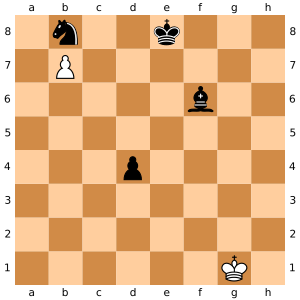

In [235]:
simulation.start()